In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import ssl
import certifi

In [68]:
#This is used to the direct the ssl correctly to import the needed files from the environment. When we put this into script may need to find how to handle this
#try:
#    _create_unverified_https_context = ssl._create_unverified_context
#except AttributeError:
#    pass
##else:
 #   ssl._create_default_https_context = _create_unverified_https_context##

#nltk.download('punkt', ssl_context=ssl.create_default_context(cafile=certifi.where()))
#nltk.download('stopwords', ssl_context=ssl.create_default_context(cafile=certifi.where()))

In [54]:
nltk.download('punkt', download_dir='/Users/brianpak/Desktop/ham_detector/env/lib/nltk_data')
nltk.download('punkt_tab', download_dir='/Users/brianpak/Desktop/ham_detector/env/lib/nltk_data')
nltk.download('stopwords', download_dir='/Users/brianpak/Desktop/ham_detector/env/lib/nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brianpak/Desktop/ham_detector/env/lib/nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/brianpak/Desktop/ham_detector/env/lib/nltk_data
[nltk_data]     ...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianpak/Desktop/ham_detector/env/lib/nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


True

# Initial EDA to Evaluate Data

In [69]:
#Reading in Data
df = pd.read_csv('./data/spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df[['v1','v2']]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Reviewing overall data set to determine if there are any null values and look at initial distribution
print(df.describe())
print(df.info())
print(df.isnull().sum())

          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
v1    0
v2    0
dtype: int64


In [70]:
#Determining the length of the rows text 
df['text_length'] = df['v2'].apply(len)

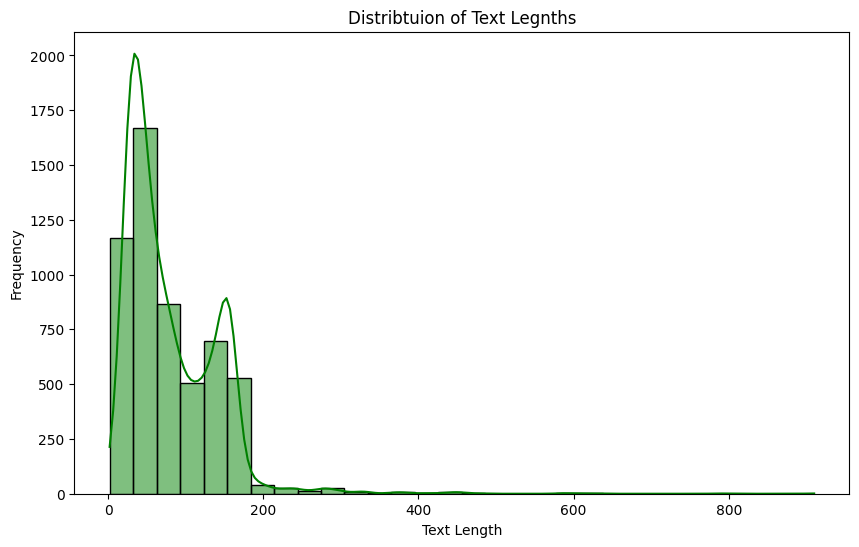

In [71]:
#graphing the distribution of the text lengths within the dataframe
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color = 'green')
plt.title('Distribtuion of Text Legnths')
plt.xlabel('Distributino of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
#Importing stopword s
stop_words = set(stopwords.words('english'))

In [11]:
#may need to convert to utf-8?
#df['v2'] = df['v2'].apply(lambda x: x.encode('ISO-8859-1').decode('utf-8') if isinstance(x, str) else '')


In [12]:
# Check for any remaining problematic characters
problematic_rows = df[df['v2'].apply(lambda x: any(ord(char) > 128 for char in x))]
print(problematic_rows) 

        v1                                                 v2  text_length
5     spam  FreeMsg Hey there darling it's been 3 week's n...          148
8     spam  WINNER!! As a valued network customer you have...          158
12    spam  URGENT! You have won a 1 week FREE membership ...          156
18     ham  Fine if thatåÕs the way u feel. ThatåÕs the wa...           58
19    spam  England v Macedonia - dont miss the goals/team...          156
...    ...                                                ...          ...
5511   ham            ItÛ÷s reassuring, in this crazy world.           39
5524  spam  You are awarded a SiPix Digital Camera! call 0...          153
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...          160
5567  spam  This is the 2nd time we have tried 2 contact u...          161
5568   ham              Will Ì_ b going to esplanade fr home?           37

[481 rows x 3 columns]


In [14]:
#creating a column with the tokenized text
df['tokenized_text'] = df['v2'].apply(lambda x: 
                                      [word for word in x.lower().split() if word not in stop_words] 
                                      if isinstance(x, str) else [])


In [15]:
df

,v1,v2,text_length,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point,, crazy.., available, bugis..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar..., joking, wif, u, oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor..., u, c, already, sa..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, think, goes, usf,, lives, around, though]"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,"[2nd, time, tried, 2, contact, u., u, å£750, p..."
5568,ham,Will Ì_ b going to esplanade fr home?,37,"[ì_, b, going, esplanade, fr, home?]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[pity,, *, mood, that., so...any, suggestions?]"
5570,ham,The guy did some bitching but I acted like i'd...,125,"[guy, bitching, acted, like, i'd, interested, ..."


In [16]:
# list comprehension that flattens the list of lists of tokens into a single list of all words
all_words = [word for tokens in df['tokenized_text'] for word in tokens] 

In [17]:
# creates a frequency distribution of all the words in the list
word_freq = Counter(all_words)

In [18]:
#gives of the frequency of highest counted words 
print(word_freq.most_common(10))

[('u', 991), ('call', 557), ('2', 453), ('ur', 379), ("i'm", 377), ('get', 375), ('&lt;#&gt;', 276), ('go', 262), ('4', 249), ('.', 235)]


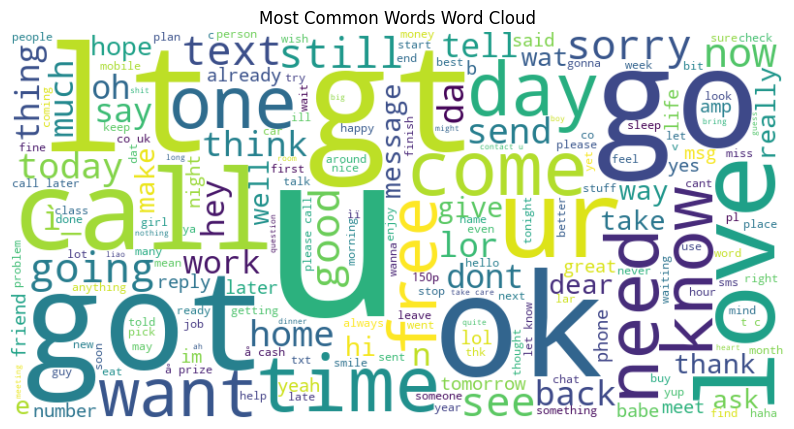

In [19]:
#creating a word cloud to visually represent the counts 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words Word Cloud')
plt.show()

In [20]:
#function that tokenizes the text data and separates to n number of grams
def get_ngrams(text, n=2):
    # Ensure the input is a string
    if not isinstance(text, str):
        return []
    # Tokenize and create n-grams
    tokens = word_tokenize(text.lower())  # This is where 'punkt' is needed
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams if all(word.isalpha() for word in grams)]

In [55]:
#creating bi grams to represent frequency
df['bigrams'] = df['v2'].apply(lambda x: get_ngrams(x, n=2))
all_bigrams = [bigram for bigrams in df['bigrams'] for bigram in bigrams]
bigram_freq = Counter(all_bigrams)

In [56]:
print(bigram_freq.most_common(10))

[('are you', 177), ('i am', 140), ('have a', 132), ('you are', 130), ('you have', 117), ('do you', 108), ('if you', 104), ('i will', 104), ('in the', 99), ('i have', 97)]


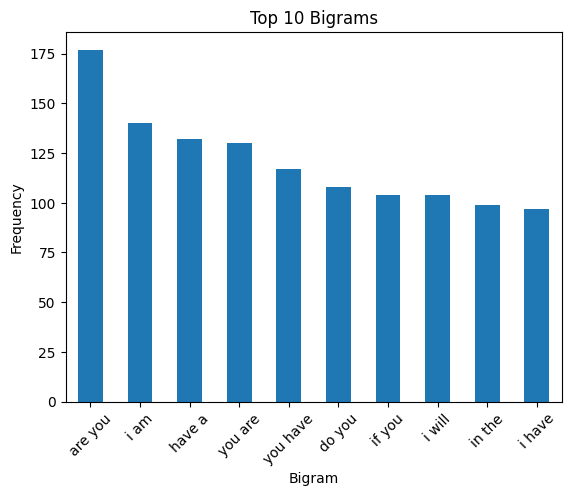

In [66]:
df_bigrams = pd.DataFrame(bigram_freq.most_common(10), columns=['Bigram', 'Frequency'])

# Plot the top 10 bigrams
df_bigrams.plot.bar(x='Bigram', y='Frequency', legend=False)
plt.title('Top 10 Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [58]:
#Tokenizing and separateing relative to 3 grams and doing a frequnecy count just to see what words are commonly used with each other
df['trigrams'] = df['v2'].apply(lambda x: get_ngrams(x,n=3))
all_trigrams = [trigram for trigrams in df['trigrams'] for trigram in trigrams]
trigram_freq = Counter(all_trigrams)

In [59]:
print(trigram_freq.most_common(10))

[('how are you', 39), ('you have won', 37), ('have won a', 33), ('i want to', 31), ('i love you', 28), ('let me know', 26), ('have a great', 25), ('i miss you', 25), ('where are you', 23), ('do you want', 21)]


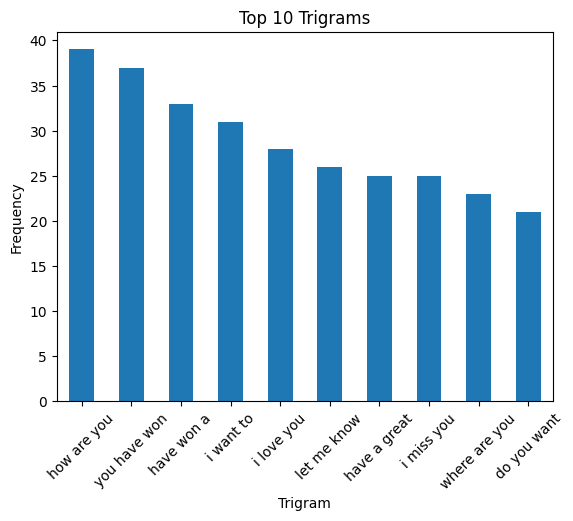

In [67]:
df_trigrams = pd.DataFrame(trigram_freq.most_common(10), columns=['Trigram', 'Frequency'])

# Plot the top 10 bigrams
df_trigrams.plot.bar(x='Trigram', y='Frequency', legend=False)
plt.title('Top 10 Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [73]:
df_trigrams

,Trigram,Frequency
0,how are you,39
1,you have won,37
2,have won a,33
3,i want to,31
4,i love you,28
5,let me know,26
6,have a great,25
7,i miss you,25
8,where are you,23
9,do you want,21
